<a href="https://colab.research.google.com/github/Weizhuo-Zhang/ML_coursera/blob/master/hands_on_ML/6_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 六、决策树 Decision Tree

## 决策树的训练和可视化

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

你可以通过使用 `export_graphviz()` 方法，通过生成一个叫做 `iris_tree.dot` 的图形定义文件将一个训练好的决策树模型可视化。

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

然后，我们可以利用 `graphviz package` 中的 `dot` 命令行，将 `.dot` 文件转换成 `PDF` 或 `PNG` 等多种数据格式。例如，使用命令行将 `.dot` 文件转换成 `.png` 文件的命令如下：

Graphviz 是一款开源图形可视化软件包

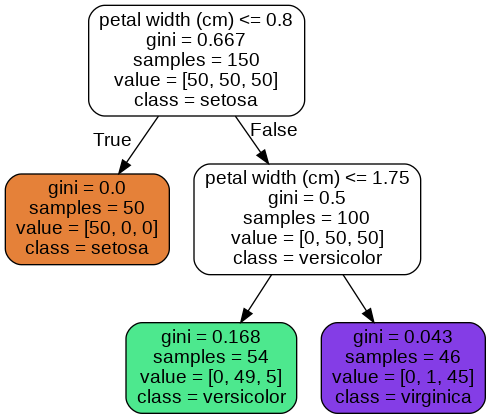

In [8]:
!dot -Tpng iris_tree.dot -o iris_tree.png
from IPython.display import Image
Image('iris_tree.png')

## 开始预测

决策树的众多特性之一就是， 它不需要太多的数据预处理， 尤其是不需要进行特征的缩放或者归一化。

## 估计分类概率

决策树还可以估计某个实例属于特定类 k 的概率：首先遍历树来查找此实例的叶节点，然后它返回此节点中类 k 的训练实例的比例。

In [9]:
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


## CART 训练算法

**`Scikit-Learn`** 用分裂回归树（`Classification And Regression Tree`，简称 `CART`）算法训练决策树（也叫“增长树”）。

## 计算复杂度

在建立好决策树模型后， 做出预测需要遍历决策树， 从根节点一直到叶节点。决策树通常近似左右平衡，因此遍历决策树需要经历大致 $O(log_2m)$ 个节点。由于每个节点只需要检查一个特征的值，因此总体预测复杂度仅为$O(log_2m)$ ，与特征的数量无关。 所以即使在处理大型训练集时，预测速度也非常快。

## Gini不纯度或是信息熵

##  正则化超参数

## 回归 

## 不稳定性